# Data Cleaning

In [44]:
import pandas as pd
import numpy as np

In [45]:
# Import Dataset
csv = '''2010's_Batting.csv'''
df1 = pd.read_csv(filepath_or_buffer=csv, header=0)
df1.head()

,playerID,bbrefID,bbrefIDyear,nameFirst,nameLast,yearID,stint,teamID,lgID,age,...,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,salary
0,aardsda01,aardsda01,aardsda012010,David,Aardsma,2010,1,SEA,AL,28,...,0,0,0,0,0,0,0,0,0,2750000.0
1,abadfe01,abadfe01,abadfe012010,Fernando,Abad,2010,1,HOU,NL,24,...,0,0,0,0,0,0,0,0,0,NaN
2,abreubo01,abreubo01,abreubo012010,Bobby,Abreu,2010,1,LAA,AL,36,...,0,0,0,0,41,0,93,134,17,9000000.0
3,abreuto01,abreuto01,abreuto012010,Tony,Abreu,2010,1,ARI,NL,25,...,0,12,20,15,0,0,0,0,1,407000.0
4,accarje01,accarje01,accarje012010,Jeremy,Accardo,2010,1,TOR,AL,28,...,0,0,0,0,0,0,0,0,0,1080000.0


In [46]:
# Drop unneeded columns
df2 = df1.drop(['playerID','bbrefID','nameFirst','nameLast','yearID','stint','teamID','lgID','age','bats','WAR','OPS_plus','G_p','G_of','salary'],1)
df2.head()

,bbrefIDyear,pitch,G,PA,AB,R,H,2B,3B,HR,...,GIDP,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh
0,aardsda012010,Y,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abadfe012010,Y,22,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abreubo012010,N,154,667,573,88,146,41,1,20,...,13,0,0,0,0,0,41,0,93,17
3,abreuto012010,N,81,201,193,16,45,11,1,1,...,8,0,0,12,20,15,0,0,0,1
4,accarje012010,Y,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Drop pitchers
df3 = df2[df2.pitch == 'N']
df3.head()

,bbrefIDyear,pitch,G,PA,AB,R,H,2B,3B,HR,...,GIDP,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh
2,abreubo012010,N,154,667,573,88,146,41,1,20,...,13,0,0,0,0,0,41,0,93,17
3,abreuto012010,N,81,201,193,16,45,11,1,1,...,8,0,0,12,20,15,0,0,0,1
11,aldrico012010,N,5,13,13,0,1,0,1,0,...,0,0,0,0,0,0,1,0,4,0
12,alfonel012010,N,13,41,41,4,9,1,0,1,...,2,12,0,0,0,0,0,0,0,0
13,allenbr012010,N,22,56,45,5,12,3,0,1,...,0,0,4,0,0,0,14,0,0,0


In [48]:
# Drop pitcher column
df4 = df3.drop('pitch',1)
df4.head()

,bbrefIDyear,G,PA,AB,R,H,2B,3B,HR,RBI,...,GIDP,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh
2,abreubo012010,154,667,573,88,146,41,1,20,78,...,13,0,0,0,0,0,41,0,93,17
3,abreuto012010,81,201,193,16,45,11,1,1,13,...,8,0,0,12,20,15,0,0,0,1
11,aldrico012010,5,13,13,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,4,0
12,alfonel012010,13,41,41,4,9,1,0,1,4,...,2,12,0,0,0,0,0,0,0,0
13,allenbr012010,22,56,45,5,12,3,0,1,6,...,0,0,4,0,0,0,14,0,0,0


In [49]:
# Drop players with under 81 games played
df5 = df4[df4.G > 81]
df5.head()

,bbrefIDyear,G,PA,AB,R,H,2B,3B,HR,RBI,...,GIDP,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh
2,abreubo012010,154,667,573,88,146,41,1,20,78,...,13,0,0,0,0,0,41,0,93,17
15,alvarpe012010,95,386,347,42,89,21,1,16,64,...,8,0,0,0,94,0,0,0,0,0
22,andruel012010,148,674,588,88,156,15,3,0,35,...,6,0,0,0,0,148,0,0,0,0
35,avilaal012010,104,333,294,28,67,12,0,7,31,...,12,98,0,0,0,0,0,0,0,1
36,avilemi012010,110,448,424,63,129,16,3,8,32,...,13,0,0,87,5,13,0,0,0,2


In [50]:
# Add columns for G_mid (“middle of the diamond”) and G_cor (“corners of the diamond”) based on existing defensive positions

df5.insert(loc = 28, column = 'G_mid', value = (df5['G_c'] + df5['G_2b'] + df5['G_ss'] + df5['G_cf']))
df5.insert(loc = 29, column = 'G_cor', value = (df5['G_1b'] + df5['G_3b'] + df5['G_lf'] + df5['G_rf'] + df5['G_dh']))
df5.head()

,bbrefIDyear,G,PA,AB,R,H,2B,3B,HR,RBI,...,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_dh,G_mid,G_cor
2,abreubo012010,154,667,573,88,146,41,1,20,78,...,0,0,0,0,41,0,93,17,0,151
15,alvarpe012010,95,386,347,42,89,21,1,16,64,...,0,0,94,0,0,0,0,0,0,94
22,andruel012010,148,674,588,88,156,15,3,0,35,...,0,0,0,148,0,0,0,0,148,0
35,avilaal012010,104,333,294,28,67,12,0,7,31,...,0,0,0,0,0,0,0,1,98,1
36,avilemi012010,110,448,424,63,129,16,3,8,32,...,0,87,5,13,0,0,0,2,100,7


In [51]:
# Drop Games Played by Positions
df6 = df5.drop(['G_c','G_1b','G_2b','G_3b','G_ss','G_lf','G_cf','G_rf','G_dh'],1)
df6.head()

,bbrefIDyear,G,PA,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_mid,G_cor
2,abreubo012010,154,667,573,88,146,41,1,20,78,...,10,87,132,3,2,0,5,13,0,151
15,alvarpe012010,95,386,347,42,89,21,1,16,64,...,0,37,119,1,0,0,2,8,0,94
22,andruel012010,148,674,588,88,156,15,3,0,35,...,15,64,96,0,5,17,0,6,148,0
35,avilaal012010,104,333,294,28,67,12,0,7,31,...,2,36,71,0,2,1,0,12,98,1
36,avilemi012010,110,448,424,63,129,16,3,8,32,...,5,20,49,0,1,0,3,13,100,7


In [52]:
# Add "pos" column for position. Some players play multiple positions,
# let's sort them into “corner” if they played more games at a corner position and
# vice versa for the “middle” of the field players
df6.insert(loc = 21, column = 'pos', value = np.where(df6['G_mid'] > df6['G_cor'],'mid','cor'))
df6.head()

,bbrefIDyear,G,PA,AB,R,H,2B,3B,HR,RBI,...,BB,SO,IBB,HBP,SH,SF,GIDP,G_mid,G_cor,pos
2,abreubo012010,154,667,573,88,146,41,1,20,78,...,87,132,3,2,0,5,13,0,151,cor
15,alvarpe012010,95,386,347,42,89,21,1,16,64,...,37,119,1,0,0,2,8,0,94,cor
22,andruel012010,148,674,588,88,156,15,3,0,35,...,64,96,0,5,17,0,6,148,0,mid
35,avilaal012010,104,333,294,28,67,12,0,7,31,...,36,71,0,2,1,0,12,98,1,mid
36,avilemi012010,110,448,424,63,129,16,3,8,32,...,20,49,0,1,0,3,13,100,7,mid


In [53]:
# We can now drop the 2 columns of corner and middle
df = df6.drop(['G_mid','G_cor'],1)
df.head()

,bbrefIDyear,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,pos
2,abreubo012010,154,667,573,88,146,41,1,20,78,24,10,87,132,3,2,0,5,13,cor
15,alvarpe012010,95,386,347,42,89,21,1,16,64,0,0,37,119,1,0,0,2,8,cor
22,andruel012010,148,674,588,88,156,15,3,0,35,32,15,64,96,0,5,17,0,6,mid
35,avilaal012010,104,333,294,28,67,12,0,7,31,2,2,36,71,0,2,1,0,12,mid
36,avilemi012010,110,448,424,63,129,16,3,8,32,14,5,20,49,0,1,0,3,13,mid


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 2 to 14563
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bbrefIDyear  2969 non-null   object
 1   G            2969 non-null   int64 
 2   PA           2969 non-null   int64 
 3   AB           2969 non-null   int64 
 4   R            2969 non-null   int64 
 5   H            2969 non-null   int64 
 6   2B           2969 non-null   int64 
 7   3B           2969 non-null   int64 
 8   HR           2969 non-null   int64 
 9   RBI          2969 non-null   int64 
 10  SB           2969 non-null   int64 
 11  CS           2969 non-null   int64 
 12  BB           2969 non-null   int64 
 13  SO           2969 non-null   int64 
 14  IBB          2969 non-null   int64 
 15  HBP          2969 non-null   int64 
 16  SH           2969 non-null   int64 
 17  SF           2969 non-null   int64 
 18  GIDP         2969 non-null   int64 
 19  pos          2969 non-null

# EDA

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

### Position Group

pos
cor    1640
mid    1329
dtype: int64


Text(0, 0.5, 'Players')

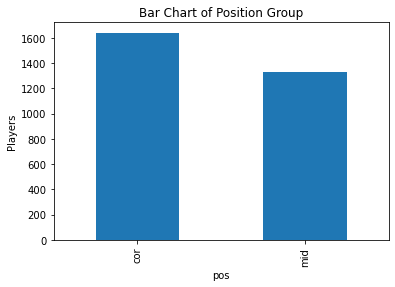

In [56]:
pos = df.groupby('pos').size()
print(pos)
pos.plot.bar()
plt.title("Bar Chart of Position Group")
plt.ylabel("Players")
# slightly more players played corners than middle (understandably so since there are 2 corners and one middle!
# and we removed pitchers)

### Correlation Matrix

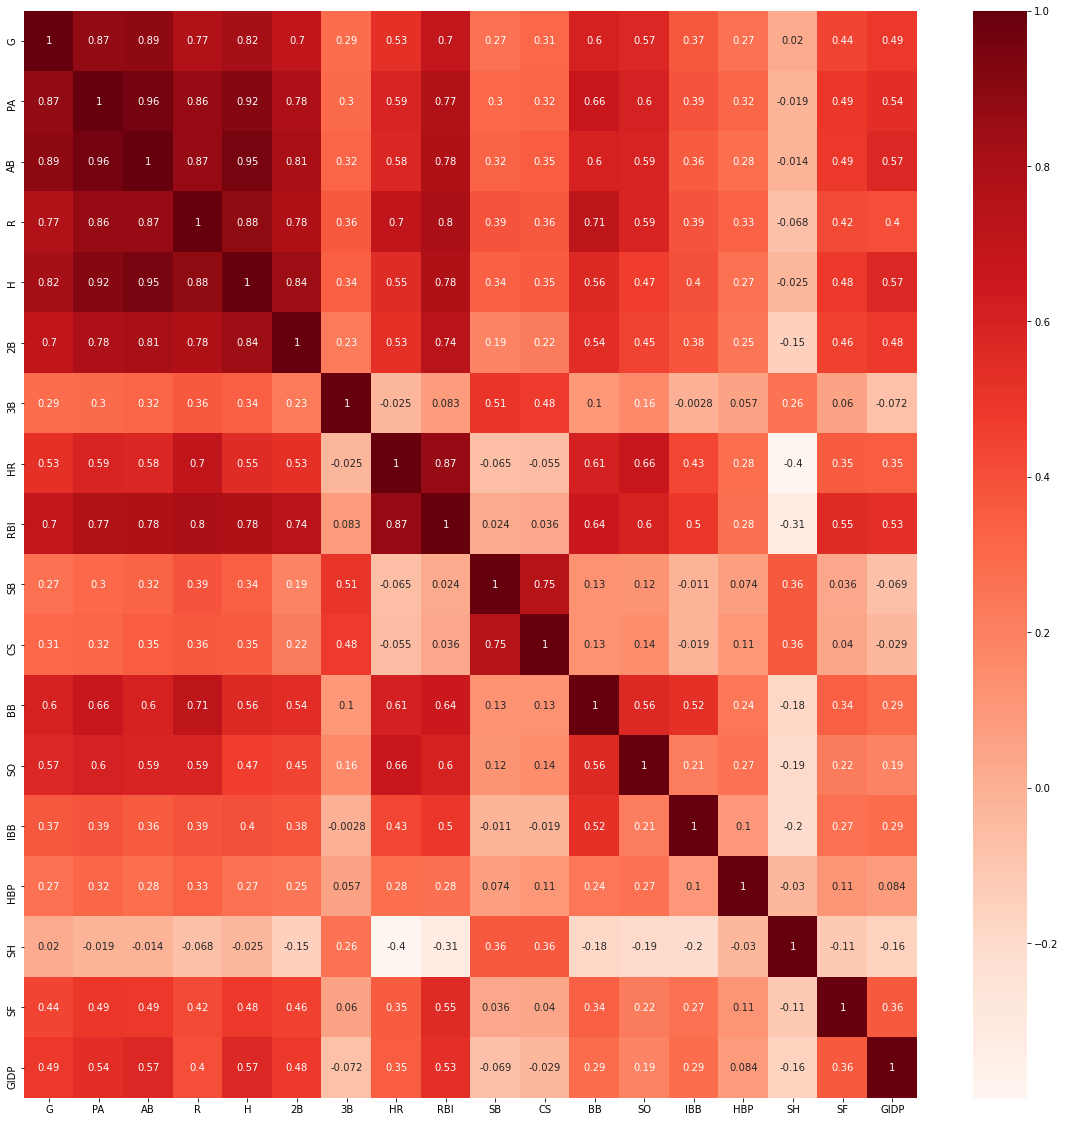

In [57]:
corrMatrix = df.corr()
plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True, cmap="Reds")
plt.show()

In [58]:
# correlation matrix revealed variables such as Games, Plate Appearances, At Bats, Runs, Hits, Doubles, Home Runs,
# Runs Batted In, and Caught Stealing have multicollinearity concerns

# let's Introduce a "Singles" Column, extracting its values from the “Hits” category
# by subtracting from it the number of “Doubles”,“Triples”, and “Home Runs”

df['1B'] = df['H'] - df['2B'] - df['3B'] - df['HR']
df.head()

,bbrefIDyear,G,PA,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,pos,1B
2,abreubo012010,154,667,573,88,146,41,1,20,78,...,10,87,132,3,2,0,5,13,cor,84
15,alvarpe012010,95,386,347,42,89,21,1,16,64,...,0,37,119,1,0,0,2,8,cor,51
22,andruel012010,148,674,588,88,156,15,3,0,35,...,15,64,96,0,5,17,0,6,mid,138
35,avilaal012010,104,333,294,28,67,12,0,7,31,...,2,36,71,0,2,1,0,12,mid,48
36,avilemi012010,110,448,424,63,129,16,3,8,32,...,5,20,49,0,1,0,3,13,mid,102


In [16]:
# Drop Columns with high multicollinearity
df = df.drop(['G','PA','R','AB','H','RBI','CS'],1)
df.head()

,bbrefIDyear,2B,3B,HR,SB,BB,SO,IBB,HBP,SH,SF,GIDP,pos,1B
2,abreubo012010,41,1,20,24,87,132,3,2,0,5,13,cor,84
15,alvarpe012010,21,1,16,0,37,119,1,0,0,2,8,cor,51
22,andruel012010,15,3,0,32,64,96,0,5,17,0,6,mid,138
35,avilaal012010,12,0,7,2,36,71,0,2,1,0,12,mid,48
36,avilemi012010,16,3,8,14,20,49,0,1,0,3,13,mid,102


In [40]:
# Rearrange Columns, placing the target column last
df = df[['bbrefIDyear','1B','2B','3B','HR','SB','BB','SO','IBB','HBP','SH','SF','GIDP','pos']]
df

,bbrefIDyear,1B,2B,3B,HR,SB,BB,SO,IBB,HBP,SH,SF,GIDP,pos
2,abreubo012010,84,41,1,20,24,87,132,3,2,0,5,13,cor
15,alvarpe012010,51,21,1,16,0,37,119,1,0,0,2,8,cor
22,andruel012010,138,15,3,0,32,64,96,0,5,17,0,6,mid
35,avilaal012010,48,12,0,7,2,36,71,0,2,1,0,12,mid
36,avilemi012010,102,16,3,8,14,20,49,0,1,0,3,13,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14529,wolteto012019,74,17,2,1,0,36,68,5,8,2,6,9,mid
14532,wongko012019,96,25,4,11,24,47,83,5,13,6,5,2,mid
14548,yastrmi012019,55,22,3,21,2,32,107,1,4,1,3,4,cor
14550,yelicch012019,85,29,3,44,30,80,118,16,8,0,3,8,cor


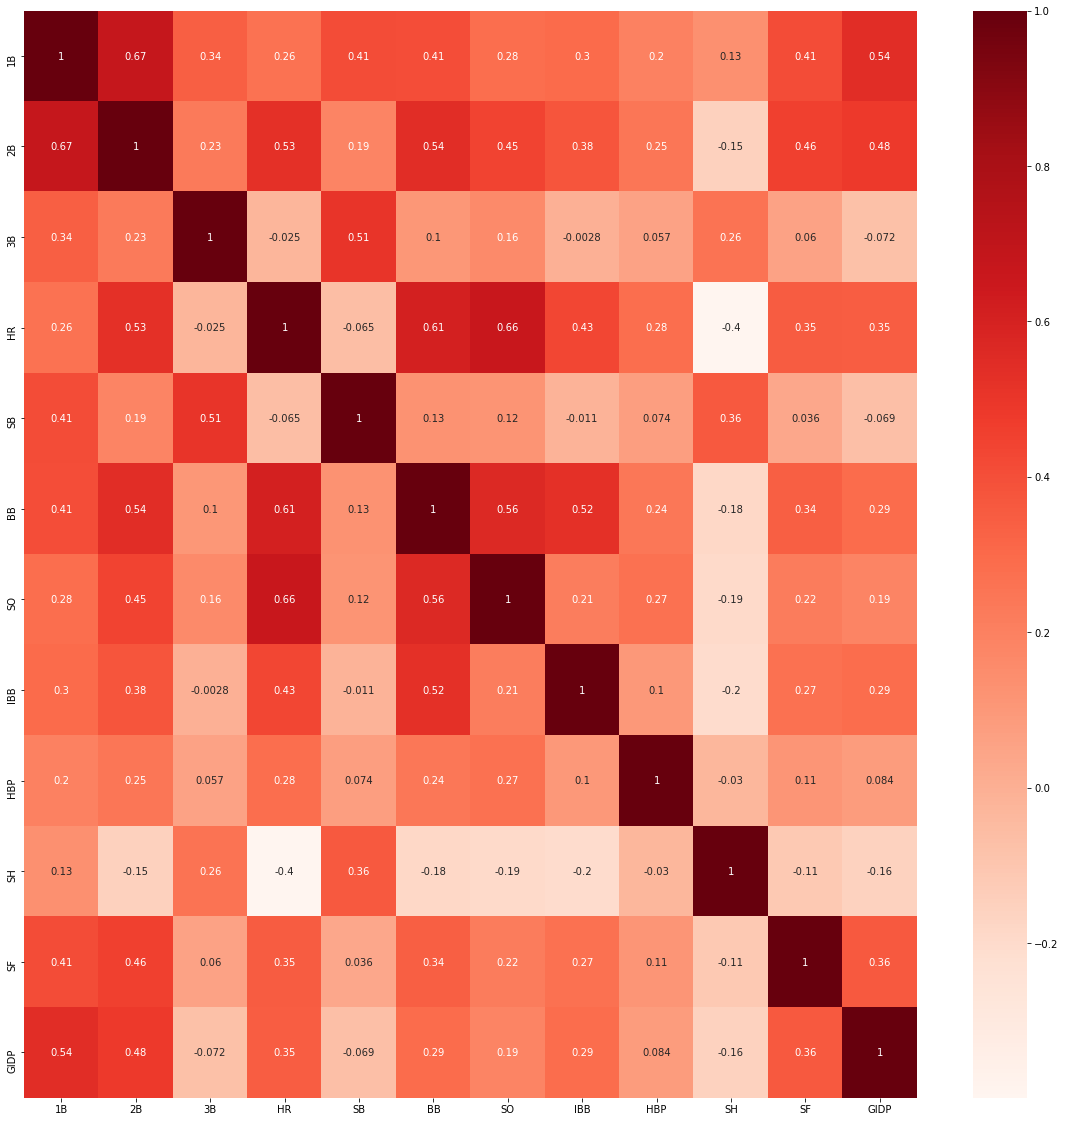

In [18]:
corrMatrix = df.corr()
plt.figure(figsize=(20,20))
sn.heatmap(corrMatrix, annot=True, cmap="Reds")
plt.show()

# Decision Tree

In [19]:
#Assign Predictor and Target df's
predictors = df.iloc[:,1:13] # predictor variables found in 2nd column until 13th column
target = df.iloc[:,13]  # target variable 'position'

# split the data into testing and training subsets using random selection
import sklearn  
from sklearn.model_selection import train_test_split
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
target_test.value_counts()

cor    480
mid    411
Name: pos, dtype: int64

In [20]:
# create decison tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth= 3, random_state=0) 
# limit tree depth for better interpretability during plotting by setting 'max_depth' to 3

#fit the tree to the training data
classifier.fit(predictors_train, target_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

Text(0.5, 1.0, 'Decison Tree for Feilding Position Type')

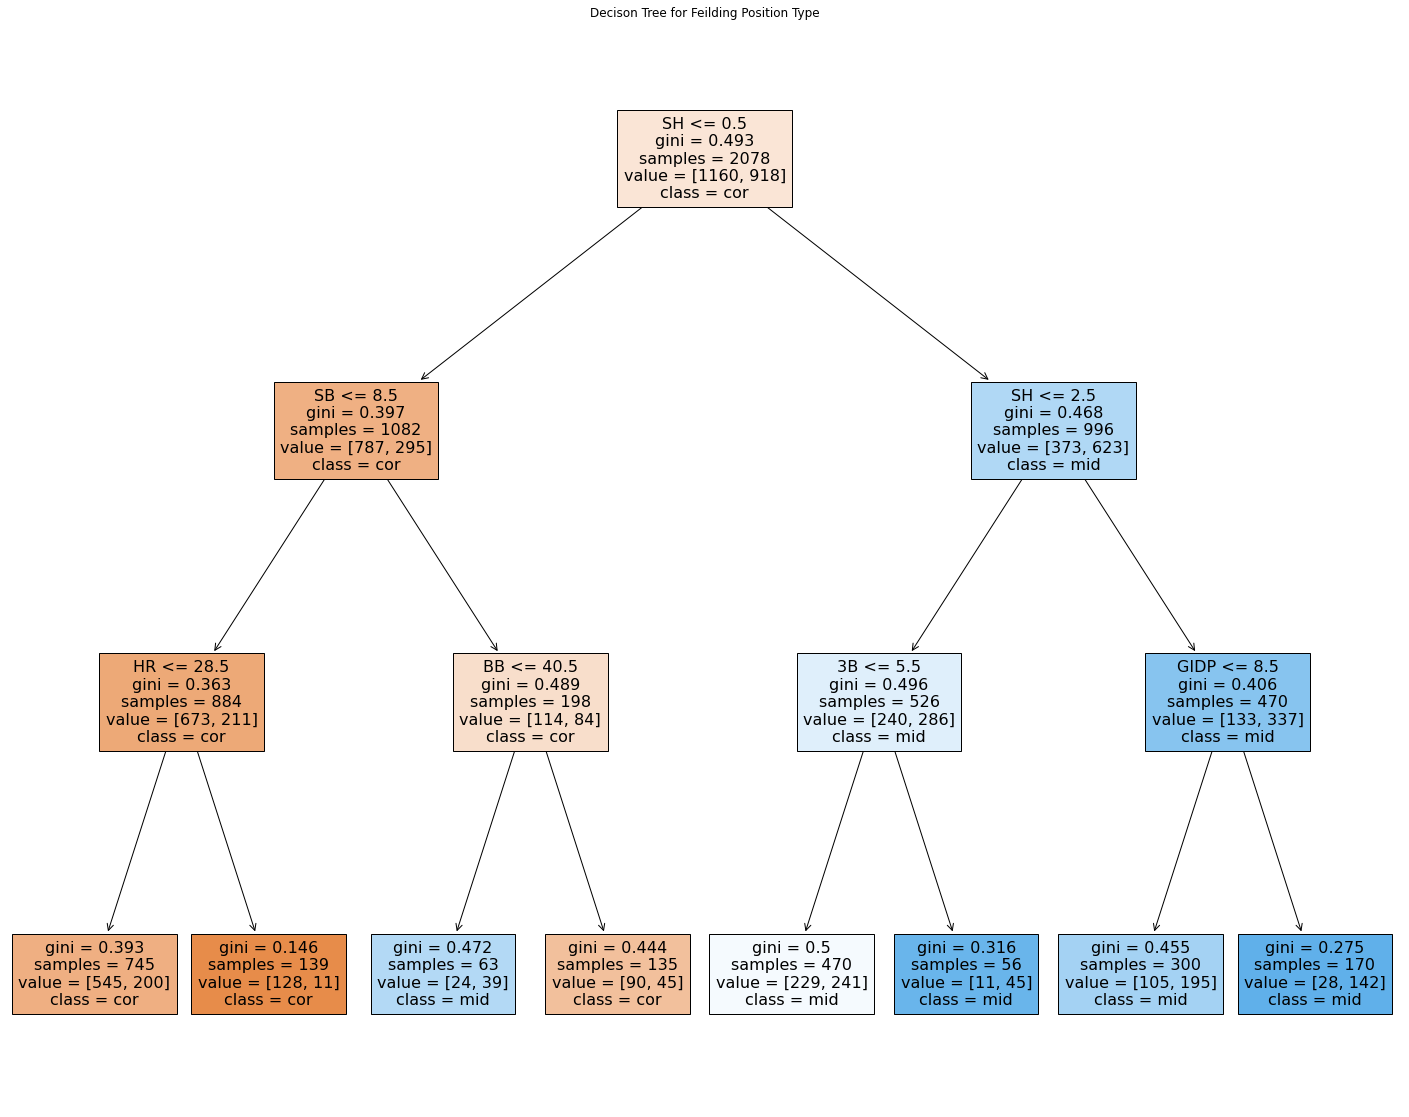

In [21]:
#from sklearn.tree import plot_tree for visualization of decision tree (requires matplotlib)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20)) # enlarge diagram

# add labels for both predictors and targets to each node and plot tree
# ('_ =' removes unreadable output)
_ = plot_tree(classifier, filled=True, class_names=['cor', 'mid'],
              feature_names=predictors.columns.values)
plt.title('Decison Tree for Feilding Position Type')

              precision    recall  f1-score   support

         cor       0.71      0.62      0.66       480
         mid       0.62      0.70      0.66       411

    accuracy                           0.66       891
   macro avg       0.66      0.66      0.66       891
weighted avg       0.67      0.66      0.66       891



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

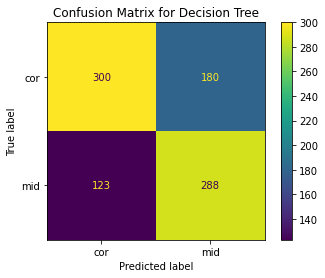

In [22]:
# fit the model to the test data
y_pred_dt = classifier.predict(predictors_test)

# evaluate the model and plot the matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(classification_report(target_test, y_pred_dt))
pcm = plot_confusion_matrix(classifier,predictors_test, target_test)
plt.title('Confusion Matrix for Decision Tree')

# not bad, for 'cor' it correctly predicted 300/480= 62% and 'mid' 288/411= 71%

In [23]:
# create random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(oob_score=True, random_state=1234)
rf.fit(predictors_train, target_train)

RandomForestClassifier(oob_score=True, random_state=1234)

              precision    recall  f1-score   support

         cor       0.70      0.74      0.72       480
         mid       0.67      0.63      0.65       411

    accuracy                           0.69       891
   macro avg       0.69      0.68      0.68       891
weighted avg       0.69      0.69      0.69       891



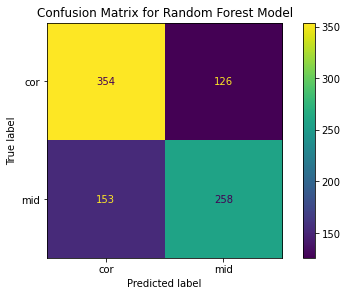

In [24]:
# fit to the test data
predicted_rf = rf.predict(predictors_test)

# evaluate the model accuracy
print(classification_report(target_test, predicted_rf))
plot_confusion_matrix(rf,predictors_test, target_test )
plt.tight_layout()
_ = plt.title('Confusion Matrix for Random Forest Model')

# improvement for 'cor' and a drop for 'mid'

### Tuning Random Forest Hyperparmeters

In [25]:
# improve the model with tuning hyperparmaters
    
from sklearn.ensemble import RandomForestRegressor
# Look at the parameters used by our current forest
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 1234, 'verbose': 0, 'warm_start': False}


In [26]:
# let's first add back in target column
predictors.insert(loc = 12, column='pos', value= target)
# Then we need to one-hot encode the target variable to fit to the random forest
# using pandas.get_dummies 
df_rf = pd.get_dummies(predictors)
print(df_rf.head()) # check if it runs
# designate 'encoded' target variable
rf_y = df_rf[['pos_cor', 'pos_mid']]
rf_y.info() # check if it runs
# drop it from original df thereby keeping original predictors df
predictors  = predictors.drop(['pos'],1)

     1B  2B  3B  HR  SB  BB   SO  IBB  HBP  SH  SF  GIDP  pos_cor  pos_mid
2    84  41   1  20  24  87  132    3    2   0   5    13        1        0
15   51  21   1  16   0  37  119    1    0   0   2     8        1        0
22  138  15   3   0  32  64   96    0    5  17   0     6        0        1
35   48  12   0   7   2  36   71    0    2   1   0    12        0        1
36  102  16   3   8  14  20   49    0    1   0   3    13        0        1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 2 to 14563
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   pos_cor  2969 non-null   uint8
 1   pos_mid  2969 non-null   uint8
dtypes: uint8(2)
memory usage: 29.0 KB


In [27]:
# split the data into testing and training subsets using random selection
x_train, x_test, y_train, y_test = train_test_split(predictors, rf_y, test_size = 0.3, random_state = 0)
y_test.value_counts()

pos_cor  pos_mid
1        0          480
0        1          411
dtype: int64

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [29]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_searchCV = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [30]:
# Fit the random search model
rf_searchCV.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [31]:
# find best parameters
rf_searchCV.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10,
 'bootstrap': True}

In [32]:
# update the model with the new improved parameters
rf_tuned = RandomForestClassifier(n_estimators=1400, min_samples_split=5, min_samples_leaf=4,
                                  max_features='auto', max_depth= 10, bootstrap=True)

In [33]:
# train the updated model
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400)

In [34]:
# fit to the test data
predicted_rf2 = rf_tuned.predict(x_test)

# evaluate the model accuracy
print(classification_report(y_test, predicted_rf2))
#plot_confusion_matrix(rf_tuned, predicted_rf2, y_test)
#plt.title('Confusion Matrix for Search Grid RF Model')

# decreased accuracy slightly

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       480
           1       0.67      0.64      0.65       411

   micro avg       0.69      0.69      0.69       891
   macro avg       0.69      0.69      0.69       891
weighted avg       0.69      0.69      0.69       891
 samples avg       0.69      0.69      0.69       891



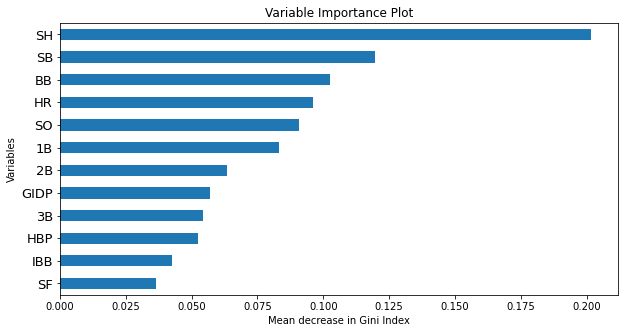

In [35]:
# Plot of Variable importance by mean decrease in gini 
model_ranks = pd.Series(rf_tuned.feature_importances_,index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False) 
model_ranks.index.name = 'Variables' 
top_features = model_ranks.iloc[:12].sort_values(ascending=True,inplace=False) 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5)) 
ax = top_features.plot(kind='barh') 
_ = ax.set_title("Variable Importance Plot") 
_ = ax.set_xlabel('Mean decrease in Gini Index') 
_ = ax.set_yticklabels(top_features.index, fontsize=13) 


